In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential # its shows what model we require
from keras.layers import  Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D # conv is convolution,we will add these layers in our dense model
from keras import utils # utils is used to plot the models
from keras.utils import np_utils # np_utils used to convert numbers into categorical
import keras
from keras.datasets import mnist # here we imported dataset mnist from keras

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
y_train[0]

5

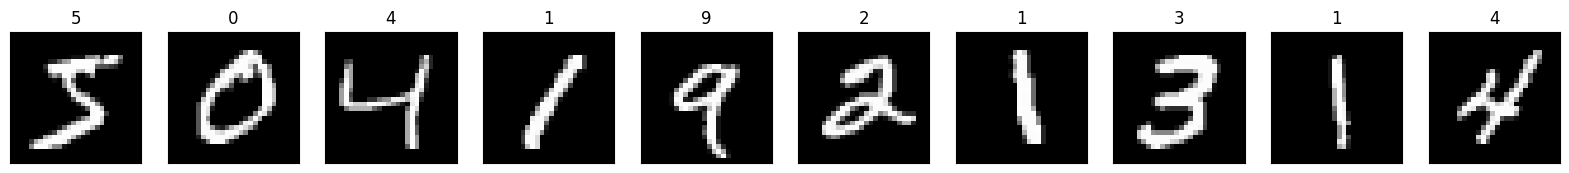

In [ ]:
fig,axes=plt.subplots(ncols=10,sharex=False,
                      sharey=True,figsize=(20,4))
for i in range(10):
  axes[i].set_title(y_train[i])
  axes[i].imshow(X_train[i],cmap='gray')
  axes[i].get_xaxis().set_visible(False) # that means we will not be able to see axes values
  axes[i].get_yaxis().set_visible(False)

plt.show()

In [ ]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [ ]:
X_train.shape # (No. of training data points,width and,height of image,no. of channel)

(60000, 28, 28, 1)

In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train/=255
X_test/=255

Y_train=np_utils.to_categorical(y_train,10)
Y_test=np_utils.to_categorical(y_test,10)

In [ ]:
Y_train[0] # it shows above y_train output like this

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model=Sequential() # here model type is sequential,it means here we have layers one after another
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1))) # now add layers,32 is a no. of filters,(3,3) is kernel size
model.add(MaxPooling2D((2,2))) # (2,2) because kernel will move only in 2 directions
model.add(Flatten())
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

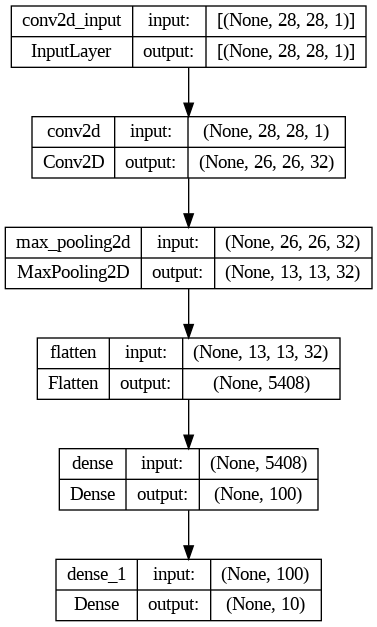

In [ ]:
utils.plot_model(model,show_shapes=True) # here batch size is None

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,Y_train,batch_size=32,epochs=2,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/2
1875/1875 [==============================] - 45s 23ms/step - loss: 0.1382 - accuracy: 0.9579 - val_loss: 0.0558 - val_accuracy: 0.9838
Epoch 2/2
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0462 - accuracy: 0.9857 - val_loss: 0.0530 - val_accuracy: 0.9834


In [ ]:
model.save('mnist_cnn_model.h5')

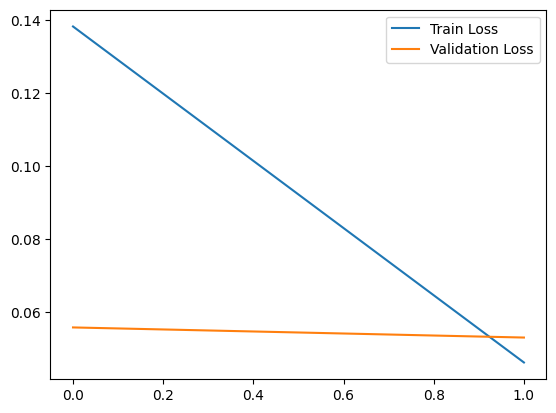

In [ ]:
plt.plot(model.history.history['loss'],label='Train Loss')
plt.plot(model.history.history['val_loss'],label='Validation Loss')
plt.legend()

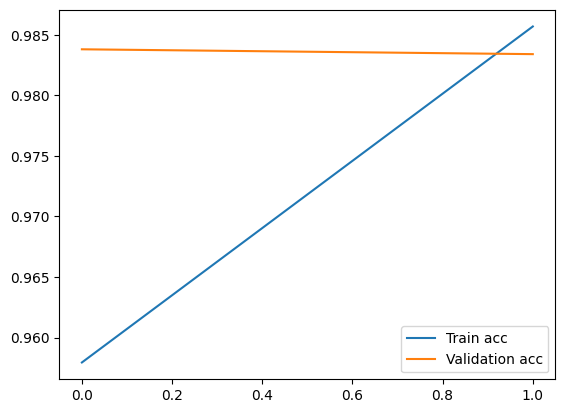

In [ ]:
plt.plot(model.history.history['accuracy'],label='Train acc')
plt.plot(model.history.history['val_accuracy'],label='Validation acc')
plt.legend()

In [ ]:
model=keras.models.load_model('mnist_cnn_model.h5')

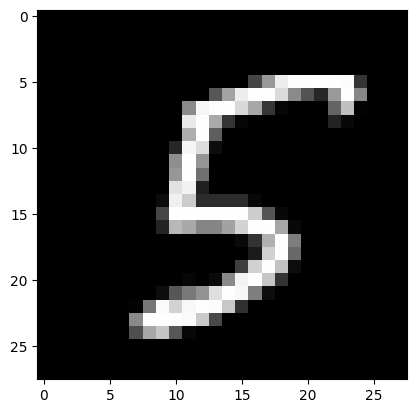

In [ ]:
plt.imshow(X_test[23],cmap='gray')

In [ ]:
x=np.reshape(X_test[2],(1,28,28,1))
# x=x.astype('float32')
# x/=255

np.argmax(model.predict(x))

1/1 [==============================] - 0s 23ms/step


1

In [ ]:
model.predict(x)

1/1 [==============================] - 0s 24ms/step


array([[1.19432832e-06, 9.99749601e-01, 1.81325993e-06, 9.96954075e-09,
        8.37418920e-05, 2.92228691e-07, 8.29296539e-07, 1.48927298e-04,
        1.29991795e-05, 5.38371125e-07]], dtype=float32)